In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete, gamma

from base import PeriodicHeterogeneousRenewalModel

In [2]:
rng = np.random.default_rng(0)

In [3]:
period = 360
time_vec = np.arange(period)
reproduction_no_vec = 2 + np.cos(2 * np.pi * (time_vec - 30) / period)

generation_time_max = 30
generation_time_vals = np.arange(1, generation_time_max + 1)
generation_time_probs = gamma.pdf(generation_time_vals, a=3, scale=5 / 3)
generation_time_probs /= generation_time_probs.sum()
generation_time_dist = rv_discrete(values=(generation_time_vals, generation_time_probs))

dispersion_param = 0.41

In [4]:
model = PeriodicHeterogeneousRenewalModel(
    time_vec=time_vec,
    reproduction_no_vec=reproduction_no_vec,
    generation_time_dist=generation_time_dist,
    dispersion_param=dispersion_param,
)

<BarContainer object of 59 artists>

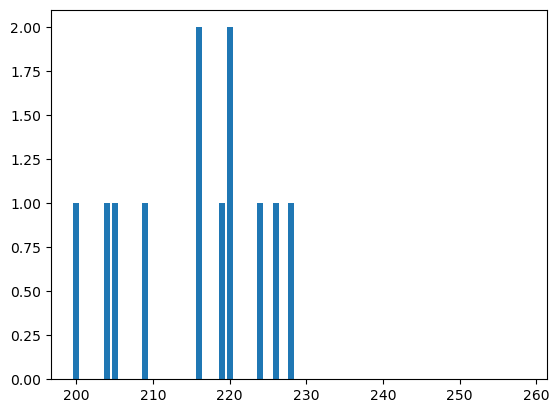

In [5]:
output = model.simulate(time_start=200, rng=rng)
plt.bar(output["time_vec"], output["incidence_vec"])

In [6]:
time_vec = np.arange(2 * period)
cor_vec = model.case_outbreak_risk(time_vec, maxiter=100)

In [7]:
ior_vec = model.instantaneous_outbreak_risk(time_vec)

In [11]:
time_vec_sim = np.arange(2 * period, step=30)
sor_vec = model.simulated_outbreak_risk(
    time_vec_sim, incidence_cutoff=10, no_simulations=1000, rng=rng
)

(0.0, 1.0)

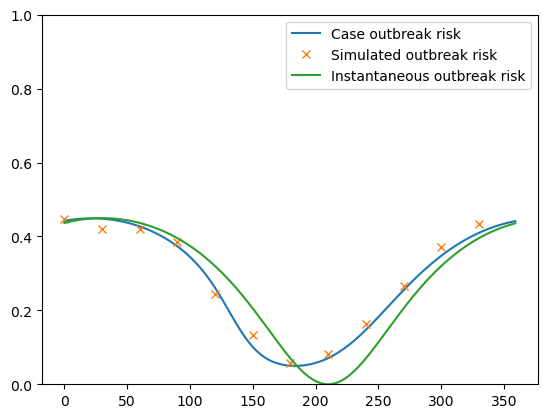

In [9]:
plt.plot(time_vec, cor_vec)
plt.plot(time_vec_sim, sor_vec, "x")
plt.plot(time_vec, ior_vec)
plt.legend(
    ["Case outbreak risk", "Simulated outbreak risk", "Instantaneous outbreak risk"]
)
plt.ylim(0, 1)

(0.0, 1.0)

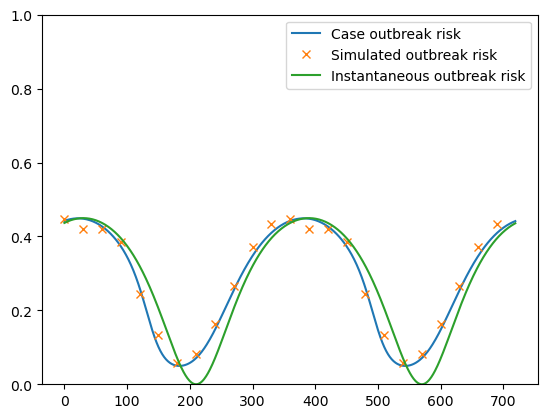

In [10]:
plt.plot(
    np.concatenate((time_vec, time_vec + period)), np.concatenate((cor_vec, cor_vec))
)
plt.plot(
    np.concatenate((time_vec_sim, time_vec_sim + period)),
    np.concatenate((sor_vec, sor_vec)),
    "x",
)
plt.plot(
    np.concatenate((time_vec, time_vec + period)), np.concatenate((ior_vec, ior_vec))
)
plt.legend(
    ["Case outbreak risk", "Simulated outbreak risk", "Instantaneous outbreak risk"]
)
plt.ylim(0, 1)